# The spark foundation

## Task 6 - prediction using decision tree algorithm

### [Dataset link](https://bit.ly/3kXTdox)

## Name of the author - Parth Sevak


In [54]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sns

import pydotplus
import graphviz

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wg
wg.filterwarnings("ignore")

### Loading the 1st dataset

In [24]:
df = pd.read_csv("Dataset/Iris.csv")

In [25]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [28]:
df.shape

(150, 6)

In [29]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [30]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
#checking co-relation between numeric columns
numeric_col = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_col.corr()

# Print the correlation matrix
print(correlation_matrix)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


<Axes: >

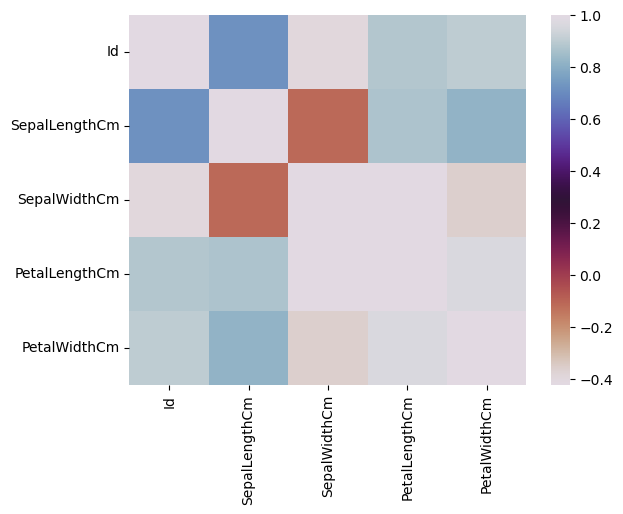

In [32]:
sns.heatmap(numeric_col.corr() , cmap = "twilight_r")

<Axes: >

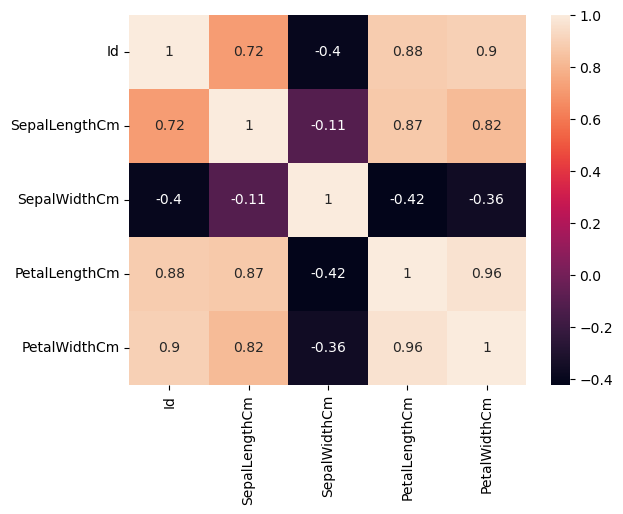

In [33]:
sns.heatmap(numeric_col.corr(),annot=True)

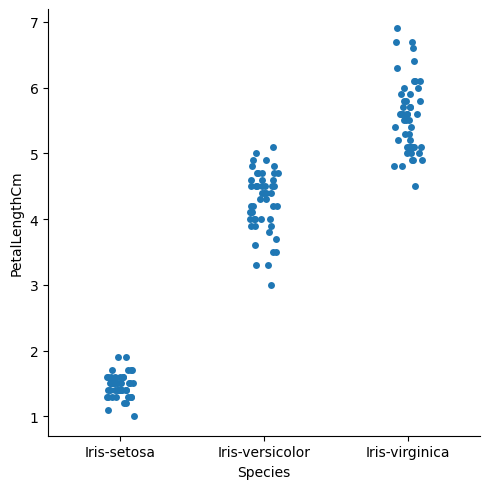

In [34]:
#checking category of petallength in species
sns.catplot(x ='Species',y ='PetalLengthCm', data = df)

In [35]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pydotplus

In [36]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier, plot_tree #for using Decision Tree Algoithm
from io import StringIO
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus

In [37]:
iris = pd.read_csv("Dataset\Iris.csv")

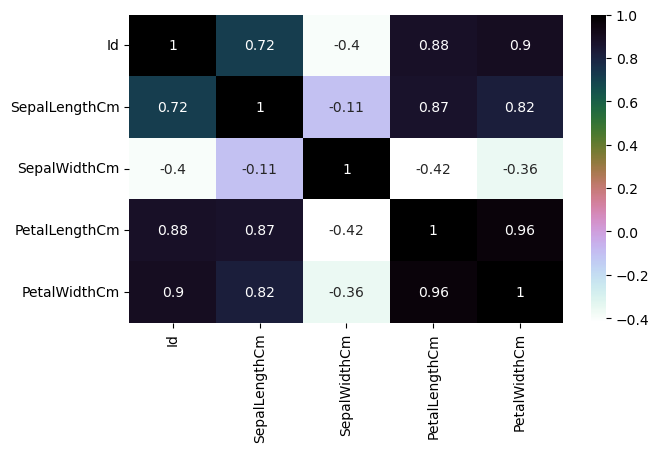

In [38]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [39]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [40]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [41]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
101,5.8,2.7,5.1,1.9
6,4.6,3.4,1.4,0.3


In [42]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
90,5.5,2.6,4.4,1.2
123,6.3,2.7,4.9,1.8


In [43]:
train_y.head()  ##output of the training data

101     Iris-virginica
6          Iris-setosa
113     Iris-virginica
136     Iris-virginica
95     Iris-versicolor
Name: Species, dtype: object

## Modelling

### Model the data using decision tree classification  model

In [44]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9555555555555556


In [45]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9777777777777777


In [46]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


In [49]:
# Define a variable to establish three classes/species.
class_count = 3
# Define standard RGB color scheme for visualizing ternary classification in order to match the color map used later.
plot_colors = 'brg'
# Define marker options for plotting class assignments of training data.
markers = 'ovs'
# We also need to establish a resolution for plotting.  I favor clean powers of ten, but this is not by any means a hard and fast rule.
plot_res = 0.01

In [52]:
from sklearn.datasets import load_iris
iris = load_iris()

(0.5, 7.390000000000006, -0.4, 2.9900000000000033)

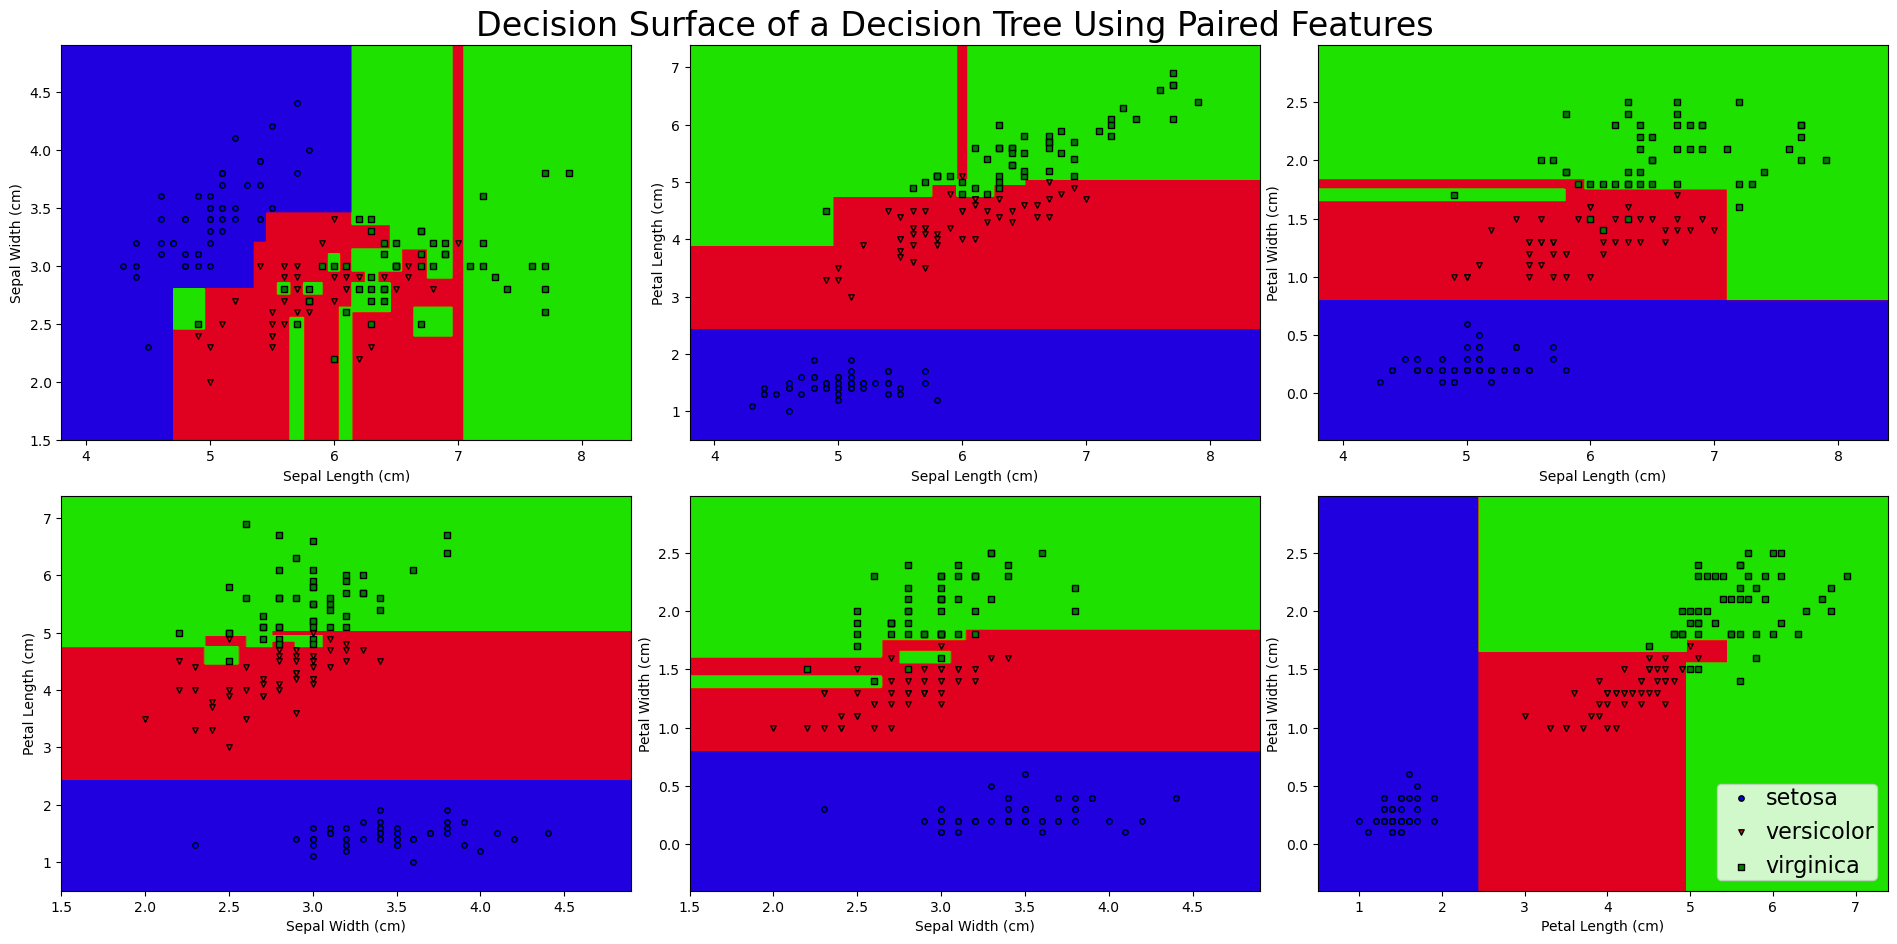

In [55]:
# Set the size of the figure used to contain the subplots to be generated.
plt.figure(figsize=(20,10))

# Create an empty list of models to store the results of each pairwise model fit.
models = []

# Use enumerate() to define the possible pairs of features available and iterate over each pair.
for pair_index, pair in enumerate([[0, 1], [0, 2], [0, 3], 
                                           [1, 2], [1, 3], 
                                                   [2, 3] ]):

    # We only take the two features corresponding to the pair in question...
    X, y = iris.data[:, pair] , iris.target
    
    # ... to fit the decision tree classifier model.
    model = DecisionTreeClassifier().fit(X, y)
    
    # Append the results to the models list
    models.append(model)
    
    # Establish a two row by three column subplot array for plotting.
    plt.subplot(2, 3, pair_index + 1)
    
    # Define appropriate x and y ranges for each plot...
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    # ... and use each range to define a meshgrid to use as the plotting area.
    xx, yy = np.meshgrid(np.arange(x_min, 
                                   x_max, 
                                   plot_res),
                         np.arange(y_min, 
                                   y_max, 
                                   plot_res) )
    # Use plt.tight_layout() to establish spacing of the subplots.
    plt.tight_layout(h_pad = 0.5, 
                     w_pad = 0.5, 
                       pad = 4.0 )
    
    # Predict the classification of each point in the meshgrid based on the calculated model above.
    # The numpy methods .c_() and .ravel() reshape our meshgrid values into a format compatible with our model.predict() method,
    Z = model.predict(np.c_[xx.ravel(), 
                            yy.ravel() ])
    # Reshape the predictions to match xx...
    Z = Z.reshape(xx.shape)
    # ... and prepare a contour plot that reflects the predictions .
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.brg)
    
    # Define the subplot axis labels after title casing while preserving case on the unit of measure 
    plt.xlabel(iris.feature_names[pair[0]].title()[0:-4] + iris.feature_names[pair[0]][-4:])
    plt.ylabel(iris.feature_names[pair[1]].title()[0:-4] + iris.feature_names[pair[1]][-4:])
    
    # Plot the training points for each species in turn
    for i, color, marker in zip(range(class_count), plot_colors, markers):
        # Subset the data to the class in question with the np.where() method
        index = np.where(y == i)
        # Plot the class in question on the subplot
        plt.scatter(X[index, 0], 
                    X[index, 1], 
                    c = color,
                    marker = marker,
                    label = iris.target_names[i],
                    cmap = plt.cm.brg, 
                    edgecolor = 'black', 
                    s = 15                       )

# Define a title for the overall collection of subplots after each subplot is fully defined
plt.suptitle('Decision Surface of a Decision Tree Using Paired Features',
             size = 24                                                   )

# Define the legend for the subplot collection
plt.legend(loc = 'lower right',
           fontsize = 16,
           borderpad = 0.1, 
           handletextpad = 0.1 )

# Set limits just large enough to show everything cleanly
plt.axis("tight")


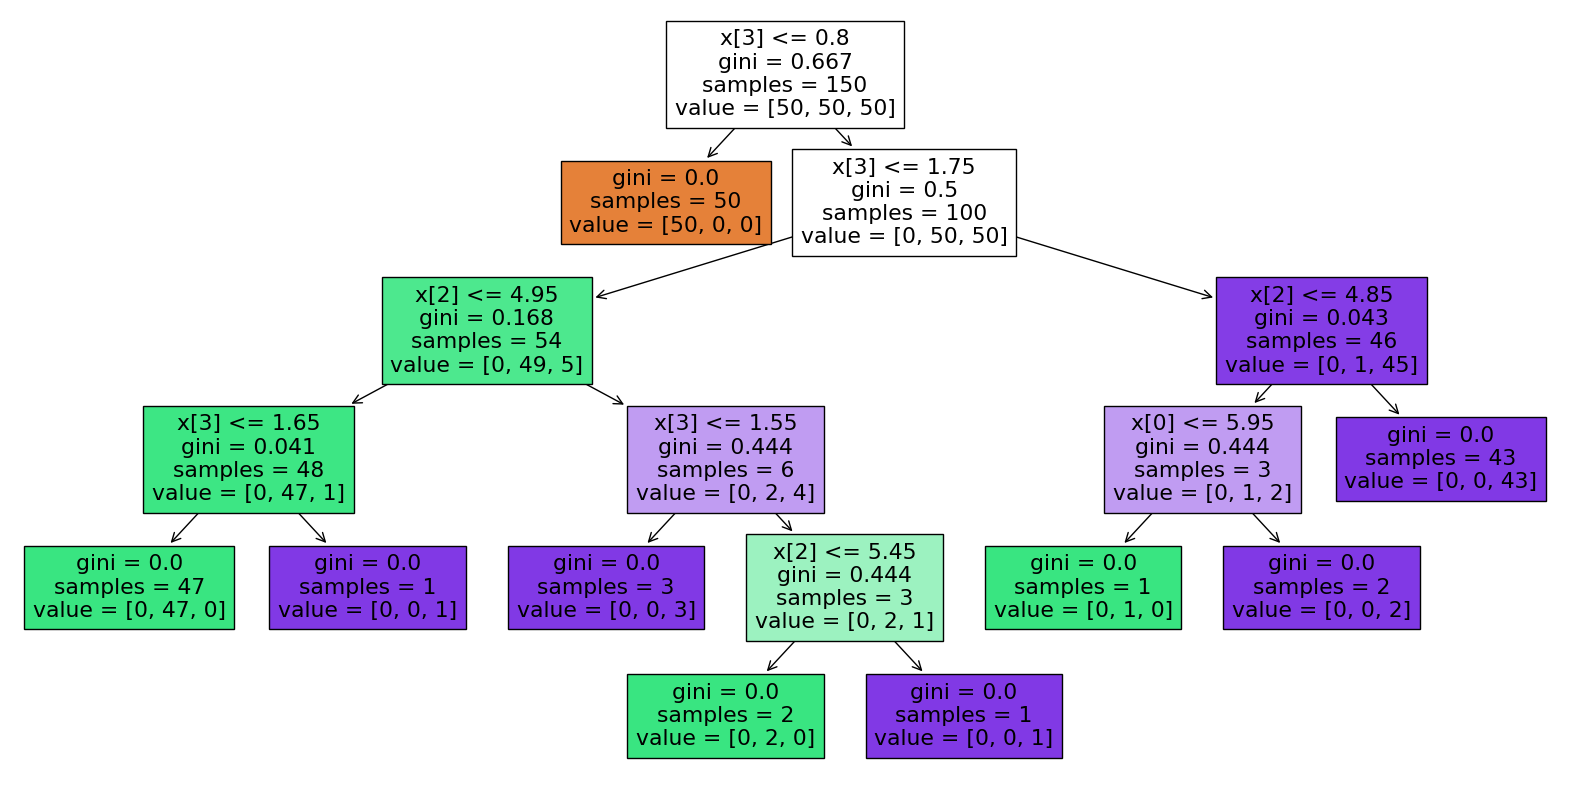

In [56]:
# Apply the decision tree classifier model to the data using all four parameters at once.
model_all_params = DecisionTreeClassifier().fit(iris.data, iris.target)
# Prepare a plot figure with set size.
plt.figure(figsize = (20,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(model_all_params, 
          filled=True      )
# Display the tree plot figure.
plt.show()

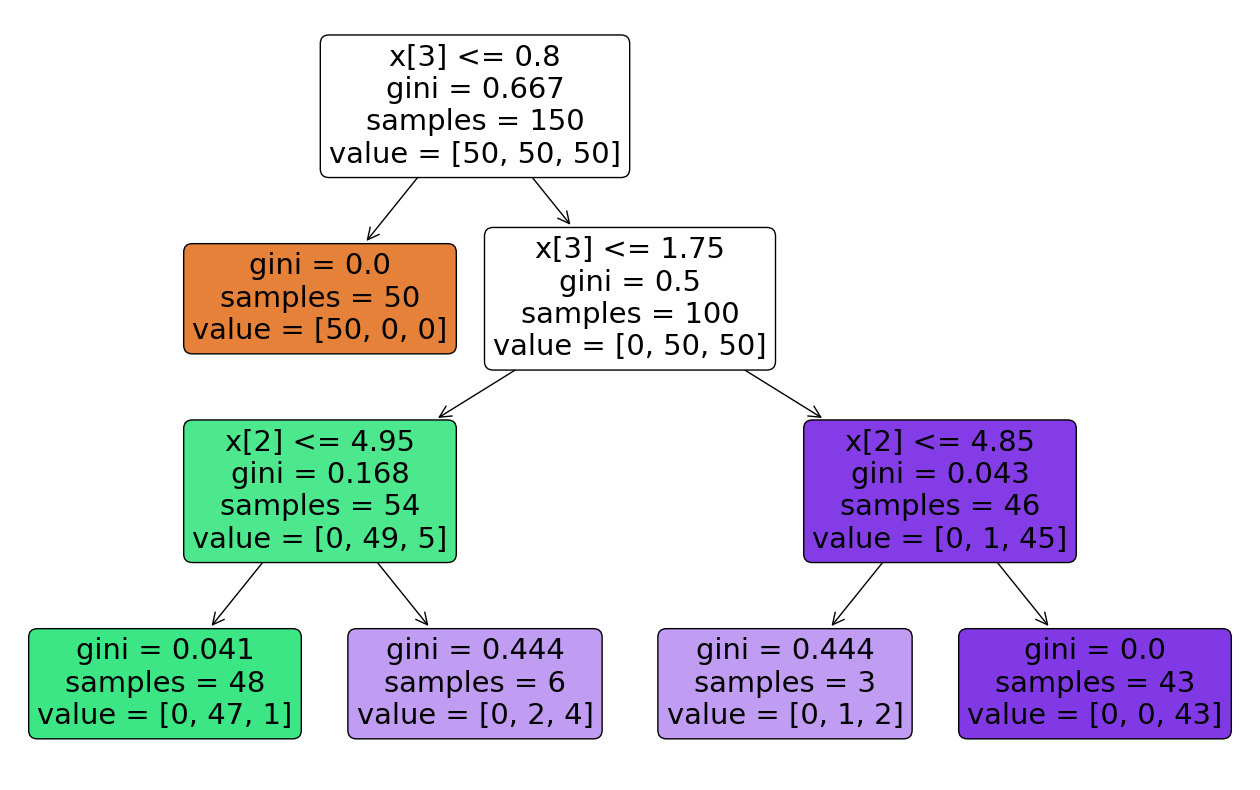

In [57]:
# Apply the decision tree classifier model to the data using all four parameters at once, but with a maximum tree depth of 3
model_all_params_max_depth_3 = DecisionTreeClassifier(max_depth = 3).fit(iris.data, iris.target)
# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model_all_params_max_depth_3,
          rounded = True,
          filled = True                )
# Display the tree plot figure.
plt.show()

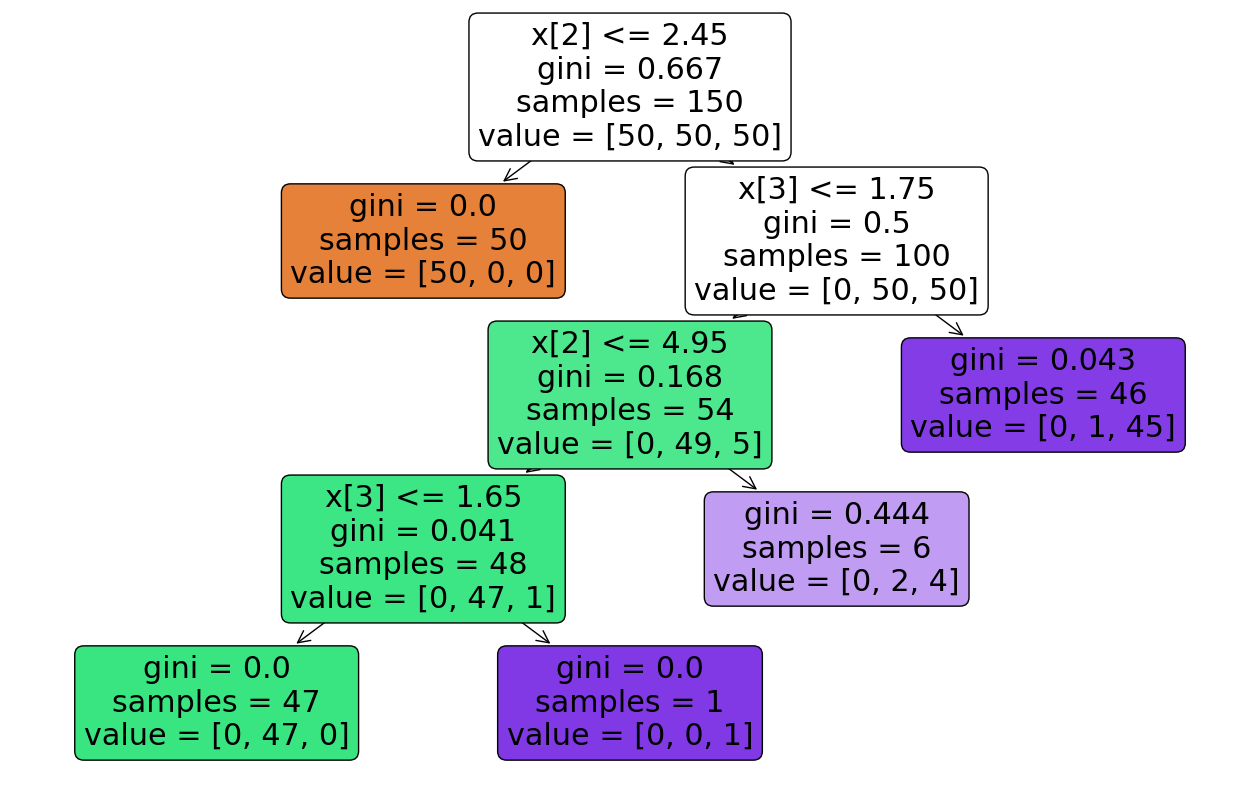

In [58]:
# Apply the model to the data as before, but with a minimum impurity decrease of 0.01
model_all_params_min_imp_dec_001 = DecisionTreeClassifier(min_impurity_decrease = 0.01).fit(iris.data, iris.target)
# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model_all_params_min_imp_dec_001,
          rounded = True,
          filled = True                )
# Display the tree plot figure.
plt.show()

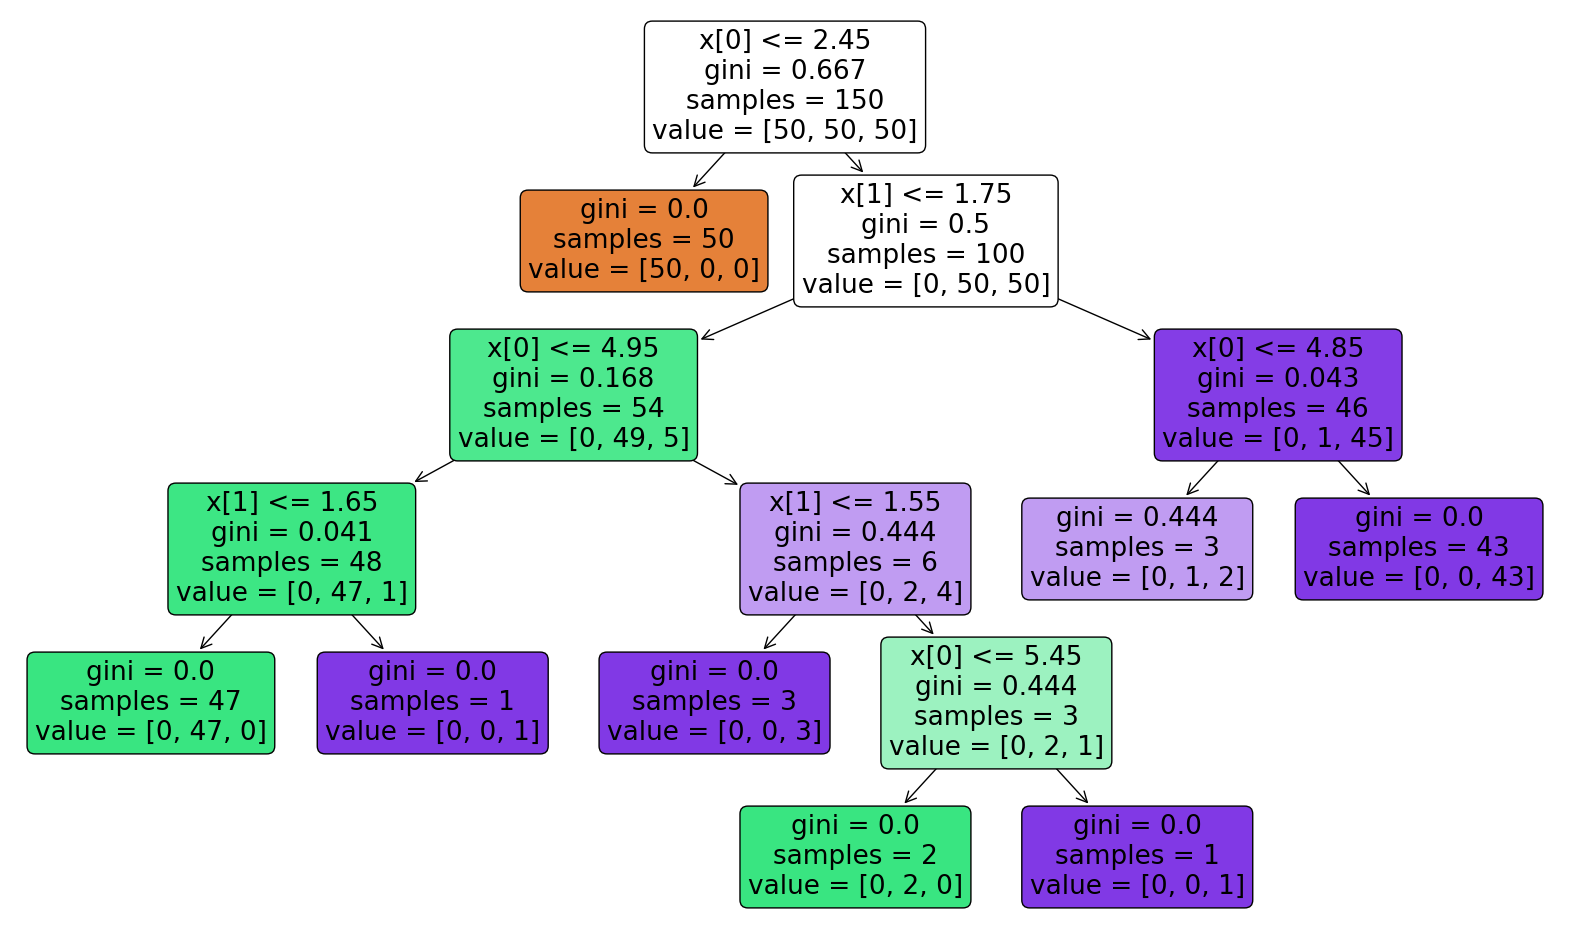

In [59]:
# Prepare a plot figure with set size.
plt.figure(figsize = (20,12))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(models[5],
          rounded = True,
          filled = True  )
# Display the tree plot figure.
plt.show()

========================================================================================================

# ===================== Thank you ===================